In [44]:
import xgboost as xgb
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from xgboost import XGBRegressor, plot_tree
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import accuracy_score, mean_squared_error, precision_score, recall_score, roc_auc_score, roc_curve, auc
import seaborn as sns

In [74]:
df = pd.read_csv("data/ML_dataset.csv", sep=";")
df.tail()

,Datetime,Price,Year,Month,Day,Hour,WindSpeed,Temperature
8873,2022-11-03 20:00:00+00:00,8.438,2022,11,3,20,5.5,6.9
8874,2022-11-03 21:00:00+00:00,6.650,2022,11,3,21,5.3,6.8
8875,2022-11-03 22:00:00+00:00,2.541,2022,11,3,22,5.6,7.0
8876,2022-11-03 23:00:00+00:00,1.830,2022,11,3,23,5.1,6.8
8877,2022-11-04 00:00:00+00:00,1.755,2022,11,4,0,5.7,6.8


In [64]:
df.to_json('data/ML_dataset.json', indent=4, orient='records',  lines=True)

In [123]:
split_ind = 8541
X = df.iloc[:,3:][:split_ind]
y = df.iloc[:,1][:split_ind]
X_val = df.iloc[:,3:][split_ind:]
y_val = df.iloc[:,1][split_ind:]

In [124]:
print(X.tail())
print(X_val.head())

      Month  Day  Hour  WindSpeed  Temperature
8536     10   20    19        3.0          8.6
8537     10   20    20        3.2          8.0
8538     10   20    21        3.4          8.0
8539     10   20    22        2.7          8.0
8540     10   20    23        3.0          7.9
      Month  Day  Hour  WindSpeed  Temperature
8541     10   21     0        5.1          7.8
8542     10   21     1        4.8          7.5
8543     10   21     2        4.6          7.4
8544     10   21     3        3.9          7.0
8545     10   21     4        4.7          7.1


In [125]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=10
)

In [126]:
regressor=xgb.XGBRegressor(eval_metric='rmsle')

# set up our search grid
param_grid = {"max_depth":    range(2,10,1),
              "n_estimators": range(300,900,100),
             "max_delta_step": range(0,10,1)}
              #"learning_rate": [0.01,0.1,0.2,0.3]}

# try out every combination of the above values
#search = RandomizedSearchCV(regressor, param_grid, cv=3, verbose=3, n_iter=50).fit(X_train, y_train)
search = GridSearchCV(regressor, param_grid, cv=3, verbose=3).fit(X_train, y_train)


print("The best hyperparameters are ",search.best_params_)

Fitting 3 folds for each of 48 candidates, totalling 144 fits
[CV 1/3] END .....max_depth=2, n_estimators=300;, score=0.640 total time=   0.2s
[CV 2/3] END .....max_depth=2, n_estimators=300;, score=0.640 total time=   0.2s
[CV 3/3] END .....max_depth=2, n_estimators=300;, score=0.621 total time=   0.2s
[CV 1/3] END .....max_depth=2, n_estimators=400;, score=0.648 total time=   0.3s
[CV 2/3] END .....max_depth=2, n_estimators=400;, score=0.653 total time=   0.5s
[CV 3/3] END .....max_depth=2, n_estimators=400;, score=0.635 total time=   0.5s
[CV 1/3] END .....max_depth=2, n_estimators=500;, score=0.656 total time=   0.4s
[CV 2/3] END .....max_depth=2, n_estimators=500;, score=0.663 total time=   0.3s
[CV 3/3] END .....max_depth=2, n_estimators=500;, score=0.645 total time=   0.3s
[CV 1/3] END .....max_depth=2, n_estimators=600;, score=0.662 total time=   0.4s
[CV 2/3] END .....max_depth=2, n_estimators=600;, score=0.671 total time=   0.4s
[CV 3/3] END .....max_depth=2, n_estimators=600

[CV 3/3] END .....max_depth=7, n_estimators=600;, score=0.811 total time=   1.3s
[CV 1/3] END .....max_depth=7, n_estimators=700;, score=0.823 total time=   1.6s
[CV 2/3] END .....max_depth=7, n_estimators=700;, score=0.809 total time=   1.5s
[CV 3/3] END .....max_depth=7, n_estimators=700;, score=0.811 total time=   1.5s
[CV 1/3] END .....max_depth=7, n_estimators=800;, score=0.823 total time=   1.7s
[CV 2/3] END .....max_depth=7, n_estimators=800;, score=0.809 total time=   1.8s
[CV 3/3] END .....max_depth=7, n_estimators=800;, score=0.811 total time=   1.8s
[CV 1/3] END .....max_depth=8, n_estimators=300;, score=0.835 total time=   0.8s
[CV 2/3] END .....max_depth=8, n_estimators=300;, score=0.822 total time=   0.8s
[CV 3/3] END .....max_depth=8, n_estimators=300;, score=0.807 total time=   0.8s
[CV 1/3] END .....max_depth=8, n_estimators=400;, score=0.835 total time=   1.0s
[CV 2/3] END .....max_depth=8, n_estimators=400;, score=0.822 total time=   1.0s
[CV 3/3] END .....max_depth=

In [185]:
regressor=xgb.XGBRegressor(n_estimators=300, max_depth=9, learning_rate=0.1, max_delta_step=5)
regressor.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
             grow_policy='depthwise', importance_type=None,
             interaction_constraints='', learning_rate=0.1, max_bin=256,
             max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=5,
             max_depth=9, max_leaves=0, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=300, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [186]:
predictions = regressor.predict(X_test)

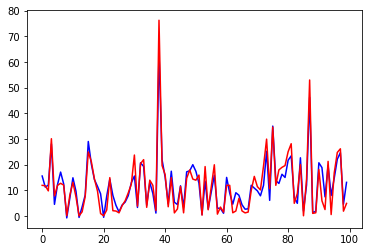

In [187]:
plt.plot(list(predictions[400:500]), color='b')
plt.plot(list(y_test[400:500]), color='r')

In [188]:
#valid

predictions_val = regressor.predict(X_val)

In [189]:
predictions_val.shape

(337,)

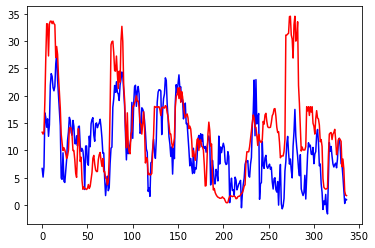

In [190]:
plt.plot(list(predictions_val), color='b')
plt.plot(list(y_val), color='r')